# 第二章 计算机上的微分

可分为三类，分别是：
- 解析微分 如Sympy和Mathematica
- 数值微分：有限差分近似 （Finite Difference）
- 自动微分：科学计算与人工智能的交叉 (Auto Differentiation)

## 解析微分

- Step1: 定义自变量符号
- Step2: 定义解析函数的形式
- Step3: 使用 sympy.diff 函数返回函数的微分结果

In [24]:
import sympy 

# Step1: define the variable
x = sympy.symbols("x")
# Step2: define the function 
def f(x):
    return x * sympy.exp(- x**2)
f(x)

x*exp(-x**2)

In [25]:
# Step3: calc the differentiation
sympy.diff(f(x), x)

-2*x**2*exp(-x**2) + exp(-x**2)

In [26]:
dfdx = sympy.diff(f(x), x)
# Set the output type to LaTeX.
sympy.print_latex(dfdx)
# The subs can Temporarily replace the x to a number.
dfdx.subs(x, 0.0)

- 2 x^{2} e^{- x^{2}} + e^{- x^{2}}


1

## 数值微分

数值微分
有限差分近似：${df \over dx} = {\rm lim}_{\Delta x\rightarrow 0} {f(x+ \Delta x) - f(x) \over \Delta x }$

In [27]:
def finite_difference(func, x, dx=0.01):
    assert(dx != 0)
    return (func(x+dx) - func(x)) / dx

finite_difference(f, 0.0)

0.999900004999833

有限差分法的原理（泰勒展开）

$f(x + \Delta x) = f(x) + {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ...$

移项得到一阶精度的前向有限差分近似，

${df \over dx}  = {f(x + \Delta x) - f(x) \over \Delta x} + O( \Delta x^2)$

截断误正比于 $\Delta x^2$, 所以 $\Delta x$ 越小结果越精确。

同理得到后向有限差分近似，

$f(x - \Delta x) = f(x) - {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ...$

移项得到一阶精度的后向有限差分近似，

${df \over dx}  = {f(x) - f(x - \Delta x) \over \Delta x} + O( \Delta x^2)$

前向与后向有限差分，有区别吗？

答案是： Yes

在偏微分方程的数值解中，有时候要构造“迎风法”，使得数值解稳定。举例：

${\partial f \over \partial t} + u {\partial f \over \partial x} = 0$

迎风法考虑信号不能超光速传播，根据对流速度 u 选择前向还是后向差分。

- u>0, 选择后向差分
- u<0, 选择前向差分

中心差分格式（二阶精度）

$f(x + \Delta x) = f(x) + {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ...$

$f(x - \Delta x) = f(x) - {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ...$

将上面两个泰勒展开公式相减，可以得到二阶精度的中心差分格式：

${df \over dx}  = {f(x + \Delta x) - f(x - \Delta x) \over 2 \Delta x} + O( \Delta x^3)$

二阶精度如果在边界处不可用，还是得考虑一阶精度。

如果考虑四个泰勒展开公式，(其中 $h=\Delta x$)：


$f(x - 2 h) =  f(x) - 2 {df \over dx} h + {d^2 f \over dx^2} {4 h^2 \over 2} - {d^3 f \over dx^3} {8 h^3 \over 6} + ... (1)$

$f(x - h) = f(x) - {df \over dx} h + {d^2 f \over dx^2} {h^2 \over 2} - {d^3 f \over dx^3} { h^3 \over 6} +... (2)$

$f(x + h) = f(x) + {df \over dx} h + {d^2 f \over dx^2} {h^2 \over 2} + {d^3 f \over dx^3} { h^3 \over 6} +... (3)$

$f(x + 2 h) = f(x) + 2 {df \over dx} h + {d^2 f \over dx^2} {4 h \over 2} + {d^3 f \over dx^3} {8 h^3 \over 6} + ... (4)$

利用$8\times((3)-(2))-((4)-(1))$，可以得到三阶精度的差分公式：

${df \over dx}  = {8(f(x + \Delta x) - f(x - \Delta x)) - f(x + 2 \Delta x) + f(x - 2 \Delta x) \over 12 \Delta x} + O( \Delta x^4)$

In [28]:
# 中心差分法
def central_difference(func, x, dx=0.01):
    """
    o(x^3)
    """
    assert(dx != 0)
    return (func(x+dx) - func(x-dx)) / 2 / dx

def three_order_difference(func, x, dx=0.01):
    """
    o(x^4)
    """
    assert(dx !=0)
    return (8*(func(x+dx) - func(x-dx))-(func(x+2*dx)-func(x-2*dx))) / 12 / dx

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# 这里作图看一下有限差分方法的误差
def comparison(dx):
    xcoord = np.linspace(0, np.pi, 20)
    # 解析微分的结果
    dfdx_ana = [dfdx.subs(x, xi) for xi in xcoord]
    # 有限差分的结果
    dfdx_num = [finite_difference(f, xi, dx) for xi in xcoord]
    # 中心差分的结果
    dfdx_cen_num = [central_difference(f, xi, dx) for xi in xcoord]
    # 三阶差分的结果
    dfdx_three_num = [three_order_difference(f, xi, dx) for xi in xcoord]
    
    plt.plot(xcoord, dfdx_num, 'ko--', label="finite difference")
    plt.plot(xcoord, dfdx_cen_num, 'b*--', label="central difference")
    plt.plot(xcoord, dfdx_three_num, 'gx--', label="three_order_difference")
    plt.plot(xcoord, dfdx_ana, 'r-', label="sympy: analytic")
    
    plt.legend(loc='best')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$df/dx$")
    
# dx小的时候，有限差分比较准确
# 移动滑钮看到 dx 大的时候，有限差分误差较大
# 同时精度越高，收敛地越快。
interact(comparison, dx=(0.001, 1))

interactive(children=(FloatSlider(value=0.5005, description='dx', max=1.0, min=0.001), Output()), _dom_classes…

<function __main__.comparison(dx)>

同理，我们也可以得到二阶微分的有限差分公式：
只需要(2)+(3)再移项就可以得到：

$${df \over dx}  = {f(x + \Delta x) - f(x - \Delta x) \over (\Delta x)^2} + O( \Delta x^3)$$

In [29]:
def two_order_centeral_difference(func, x, dx=0.01):
    """
    o(x^2)
    """
    assert(dx !=0)
    return (func(x+dx) + func(x-dx)-2*func(x)) / dx**2

df2dx2 = sympy.diff(f(x), x, 2)

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# 这里作图看一下有限差分方法的误差
def comparison(dx):
    xcoord = np.linspace(0, np.pi, 20)
    # 解析微分的结果
    df2dx2_ana = [df2dx2.subs(x, xi) for xi in xcoord]
    # 有限差分的结果
    df2dx2_num = [two_order_centeral_difference(f, xi, dx) for xi in xcoord]
    
    plt.plot(xcoord, df2dx2_num, 'ko--', label="finite difference")
    plt.plot(xcoord, df2dx2_ana, 'r-', label="sympy: analytic")
    
    plt.legend(loc='best')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$df/dx$")
    
# dx 小的时候，有限差分比较准确
# 移动滑钮看到 dx 大的时候，有限差分误差较大
interact(comparison, dx=(0.001, 1))

interactive(children=(FloatSlider(value=0.5005, description='dx', max=1.0, min=0.001), Output()), _dom_classes…

<function __main__.comparison(dx)>

In [30]:
def check_error(dx=0.1, x0=1.0):
    ana = 0.5
    num = (np.sqrt(x0 + dx) - np.sqrt(x0))/dx
    return np.abs(ana - num)
dx = np.logspace(-16, -1, 10)
err = check_error(dx)
err

array([5.00000000e-01, 2.16194004e-02, 1.39716990e-04, 4.13701855e-08,
       5.40219515e-08, 3.46406653e-09, 1.24941224e-07, 5.80184932e-06,
       2.69014627e-04, 1.19115183e-02])

Text(0, 0.5, 'error')

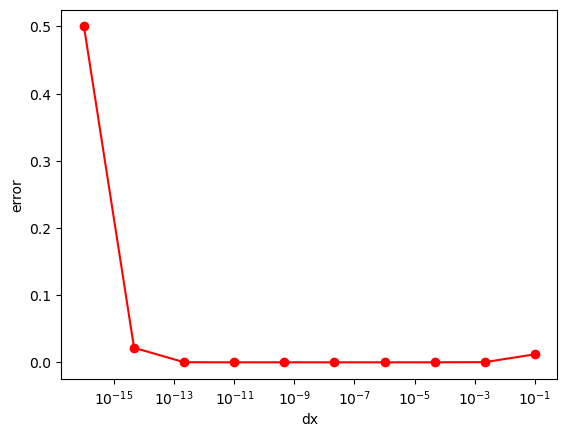

In [31]:
plt.semilogx(dx, err, 'ro-')
plt.xlabel("dx")
plt.ylabel("error")

可以看到，在某些函数中，并不是dx越小，有限差分的误差越小。

**列表函数**

对于列表函数，可以先使用插值算法得到插值多项式，然后求导。

## 自动微分（Automatic differentiation）

- 数值微分的缺点：会引入数值误差
- 解析微分的缺点：在函数复杂的时候，根据链式规则，展开项很多，计算速度慢
- 自动微分的优点：保留了数值微分速度快和解析微分结果精确。

自动微分在人工智能时代开始流行，因为 Tensorflow, pytorch 等深度学习库封装了自动微分功能。

存在两种模式：
- Forward Mode
- Backward Mode

Forward Mode:

引入对偶数（Dual number）的概念。

对于对偶数 $\varepsilon$，有 $\varepsilon^2=0$ 和 $\varepsilon \neq 0$

对于某一个函数的麦克劳林展开：

$f(x)=a_0+a_1x+a_2x^2+\cdots$

将x替换为 $x+\dot{x}\varepsilon$，并代入，有：

$f(x)=a_0+a_1(x+\dot{x}\varepsilon)+a_2(x^2+2x\dot{x}\varepsilon+(\dot{x}\varepsilon)^2)+\cdots$

根据先前设置的对偶数计算法则，我们有：

$f(x)=a_0+a_1x+a_2x^2+\cdots+a_1\dot{x}\varepsilon+a_2x\dot{x}\varepsilon+\cdots+a_nx^n\dot{x}\varepsilon$

对于后半部分，实际上可以提取出 $\dot{x} \varepsilon (a_1+a_2x+\cdots)$，括号内的部分是 $f^{\prime}(x)$

那么，我们可以得到 $f(x+\dot{x} \varepsilon)=f(x)+\dot{x} \varepsilon f^{\prime}(x)$

即 $\frac{df(x)}{dx}|_{x=\nu} = \varepsilon \ \mathrm{cofficient} (\mathrm{dual-version} (f) (\nu+1\varepsilon))$ 

事实上，对偶数可以被看做是一种无穷小，所以 $\varepsilon \neq 0$，而 $\varepsilon^2=0$ 是高阶无穷小，所以等于0。

In [32]:
# 简单举例  f(x) = x e^{-x^2}

def f(x):
    w1 = x
    w2 = w1 * w1
    w3 = np.exp(- w2)
    w4 = w1 * w3
    return w4

f(1.0)

np.float64(0.36787944117144233)

In [33]:
## 自动微分版本

def f_ad(x):
    w1 = x
    dw1 = 1
    
    w2 = w1 * w1
    dw2 = 2 * w1 * dw1
    
    w3 = np.exp(-w2)
    dw3 = - np.exp(-w2) * dw2
    
    w4 = w1 * w3
    dw4 = w1 * dw3 + dw1 * w3
    
    return w4, dw4

In [34]:
f_ad(1.0)

(np.float64(0.36787944117144233), np.float64(-0.36787944117144233))

In [35]:
dfdx.subs(x, 1.)

# dfdx 是前面用 sympy 计算出的解析微分
# 两者在小数点后 15 位都保持一致

-0.367879441171442

运算符重载的方法实现自动微分编程

举例：计算机如何做复数的加减乘除

$z_1=x_1+iy_1 \\
z_2=x_2+iy_2$

底层语言只实现了实数的加减乘除，但是使用复数库，可以直接计算

$z_1+z_2 \\
 z_1−z_2 \\
 z_1∗z_2 \\
 z_1/z_2$

复数库对 +， -， *， / 符号做了重载。而在对偶数运算中，我们同样可以仿效复数的方式对常用的运算符号和初始函数进行进行重载:

$sin(x + \dot{x} \varepsilon) = sin(x) + cos(x) \dot{x}\varepsilon \\
cos(x + \dot{x} \varepsilon) = cos(x) - sin(x)  \dot{x}\varepsilon \\
e^{x + \dot{x} \varepsilon} = e^x + e^x \dot{x} \varepsilon \\
\log(x + \dot{x} \varepsilon) = \log(x) + { \dot{x}\over x } \varepsilon \quad \; x \neq 0 \\
\sqrt{x + \dot{x} \varepsilon} = \sqrt{x} + { \dot{x}\over 2 \sqrt{x}}\varepsilon \quad \; x \neq 0 \\
(x + \dot{x} \varepsilon)^2 = x^2 + 2x \dot{x} \varepsilon \\$

In [36]:
import math
class DNumber:
    '''自动微分中的对偶数类，对 +, -, *, /, 幂次符号做了重载'''
    def __init__(self, x, dx):
        self.val = x
        self.dval = dx
    
    def __repr__(self):
        '''使用 print(DNumber(1, 2)) 时输出:1 + 2 d'''
        # 魔法方法（Magic methods），有时也被称为特殊方法，
        # 是一种具有预定义名称的方法，其特征是在开头和结尾处有双下划线，例如，__init__。
        # 它们之所以是 "魔法"，是因为这些方法是间接调用的，
        # 你不需要直接调用它们，一切都在背后完成。可以通过这些方法重载常见操作符。
        # 重载print
        return f'{self.val} + {self.dval} d'
        
    def __add__(self, other):
        '''overload a + b'''
        # 重载加法运算符，
        # 先判断other类型，如果是浮点数或者是整数就直接和已经有的对偶数的第一部分相加。
        if isinstance(other, float) or isinstance(other, int):
            val = self.val + other
            dval = self.dval
        # 如果是对偶数则直接对对应部分相加。
        if isinstance(other, DNumber):
            val = self.val+other.val
            dval = self.dval + other.dval
            
        return DNumber(val, dval)
    
    def __iadd__(self, other):
        '''overload a += b'''
        # 重载i=i+a (i+=a)运算符，
        # 只有对偶数才能和对偶数实现迭代加法。
        self.val = self.val + other.val
        self.dval = self.dval + other.dval
        return self
    
    def __mul__(self, other):
        ''' overload other * x  or other_const * x
        (other + d_other d)*(x + dx d) = other*x + (d_other x + other dx) d'''
        # 按照对偶数相乘的运算法则对正常的左乘（左操作数调用）进行重构。
        # 同样需要先判断other类型。
        if isinstance(other, float) or isinstance(other, int):
            val = other * self.val
            dval = other * self.dval
        
        if isinstance(other, DNumber):
            val = self.val * other.val
            dval = self.val * other.dval + other.val * self.dval
            
        return DNumber(val, dval)
    
    def __rmul__(self, other):
        ''' overload x * other or x * other_const'''
        # 右乘（右操作数调用）
        # 如果输入为3*DNumber(1,2)，左边不是DNumber类，必须重载右乘才能进行操作。
        # 所以其中3是self，而DNnumber(1,2)为other。
        return self.__mul__(other)
    
    def __truediv__(self, other):
        '''overload a / b'''
        # 重载除法运算符，
        # 先判断other类型，如果是浮点数或者是整数，直接和实数部分相除。
        if isinstance(other, float) or isinstance(other, int):
            val = self.val / other
            dval = self.dval / other
            return DNumber(val, dval)
        elif isinstance(other, DNumber):
            # (x + dx d)/(y + dy d) = x/y + ((dx y - x dy) / y²) d
            val = self.val / other.val
            dval = (-self.val*other.dval+self.dval*other.val) / (other.val**2)
            return DNumber(val, dval)
        else:
            return NotImplemented
        
    def __rtruediv__(self, other):
        # 重载常数除以对偶数。
        if isinstance(other, (float, int)):
            val = other / self.val
            dval = -other*self.dval / (self.val**2) 
            return DNumber(val, dval)
        else:
            return NotImplemented
    
    def __pow__(self, n):
        ''' overload power'''
        if isinstance(n, float) or isinstance(n, int):
            val = self.val**n
            dval = n * self.val**(n-1) * self.dval
        # (x1+y1d)**(x2+y2d)
        elif isinstance(n, DNumber) :
            raise(Exception("Pow(DNumber, DNumber) is not implemented yet"))
        return DNumber(val, dval)

In [37]:
s = DNumber(0.1, 1)
s + DNumber(0.2, 0)

0.30000000000000004 + 1 d

In [38]:
s += DNumber(0.2, 0)

In [39]:
s

0.30000000000000004 + 1 d

In [40]:
x = DNumber(0.1, 1)
x * x

0.010000000000000002 + 0.2 d

In [41]:
x**3

0.0010000000000000002 + 0.030000000000000006 d

In [42]:
x = DNumber(0.2, 0.2)
y = DNumber(0.3, 0.3)
x / y

0.6666666666666667 + 0.0 d

In [43]:
x = DNumber(0.2, 0.2)
2 / x

10.0 + -9.999999999999998 d

多个变量的自动微分

上面例子中f(x)是x的单变量函数，$\dot{x}=1$

如果是多变量函数f(x, y), 要求对x求微分，则应取

$\dot{x}=1, \dot{y}=0$

举例说明：

$f(x, y)= 3 x^2  y + x$

${\partial f \over \partial x} = 6 x y + 1$

在 $(x, y)=(1, 1)$ 时，$f(x, y)=4.0$，$df/dx = 7.0$

In [44]:
def f2d(x, y):
    '''
    Args: 
    x: DNumber
    y: DNumber
    return: f(x, y) = 3*x**2*y + x 
    and partial f / partial x '''
    return 3 * x**2 * y + x

In [45]:
# 求 (x,y)=(1,1) 时 f(x, y) 与 df/dx
x = DNumber(1.0, 1.0)
y = DNumber(1.0, 0.0)
print("x =", x)
print("y =", y)
print("3x^2 y + x = ", f2d(x, y))

x = 1.0 + 1.0 d
y = 1.0 + 0.0 d
3x^2 y + x =  4.0 + 7.0 d
